# Space missions analysis

# Data Cleaning and Preparation

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
space_missions_raw_df = pd.read_csv("space_missions.csv", encoding='latin1')


In [26]:
space_missions_raw_df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [27]:
space_missions_raw_df.shape

(4630, 9)

In [28]:
space_missions_raw_df.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [29]:
space_missions_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [30]:
space_missions_raw_df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [39]:
df2 = space_missions_raw_df.copy() #to make copy of data to keep orignal data as it is
df = df2.drop(columns = ['Price']) #to make dataset without price column
space_missions_raw_df.drop(columns = ['Time'], inplace = True) #to make dataset without time column
space_missions_raw_df

,Company,Location,Date,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,Zhongke-1A,Demo Flight,Active,NaN,Success


In [40]:
space_missions_raw_df['RocketStatus'].value_counts() #to check if there's any exceptional value in dataset

Retired    3620
Active     1010
Name: RocketStatus, dtype: int64

In [41]:
space_missions_raw_df['MissionStatus'].value_counts() #to check if there's any exceptional value in dataset

Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: MissionStatus, dtype: int64

# Data Visualization

In [42]:
space_missions_raw_df= space_missions_raw_df.copy() #to keep orignal data untouched
space_missions_raw_df['year'] = pd.DatetimeIndex(space_missions_raw_df.Date).year #to add a new column of year
space_missions_raw_df.head(5) #to check if the changes take place

,Company,Location,Date,Rocket,Mission,RocketStatus,Price,MissionStatus,year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I,Explorer 1,Retired,NaN,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958


In [44]:
space_missions_raw_df.value_counts(space_missions_raw_df.year,ascending = True) #to count total number of missions

year
1957      3
1959     20
1958     28
2005     37
2010     37
       ... 
1977    114
2018    117
2020    119
1971    119
2021    157
Length: 66, dtype: int64

In [45]:
#function to make seperate column for particluar value
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


In [50]:
import pandas as pd

# Example of reading the DataFrame from a CSV file
# Corrected line of code
space_missions_yearly_df = pd.read_csv('space_missions.csv', encoding='latin1')



In [54]:
# Display the columns of the DataFrame
print(space_missions_yearly_df.columns)


Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')


In [56]:
# Print the column names to see what's available
print(space_missions_yearly_df.columns)


Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')


In [58]:
# Replace 'correct_column_name' with the actual column name that contains the date
space_missions_yearly_df['year'] = pd.to_datetime(space_missions_yearly_df['Date']).dt.year


In [59]:
success_yearly_df = split_multicolumn(space_missions_yearly_df.MissionStatus)
success_yearly_df['year'] = space_missions_yearly_df.year #to add year column for easy understanding
success_yearly_df.head(5)

/tmp/ipykernel_77/1526547991.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


,Success,Failure,Partial Failure,Prelaunch Failure,year
0,True,False,False,False,1957
1,True,False,False,False,1957
2,False,True,False,False,1957
3,True,False,False,False,1958
4,False,True,False,False,1958


In [60]:
success_yearly2_df = success_yearly_df.groupby('year')[['Success']].sum() #grouping for future visualization
success_yearly2_df

,Success
year,
1957,2
1958,6
1959,8
1960,19
1961,32
...,...
2018,113
2019,100
2020,107


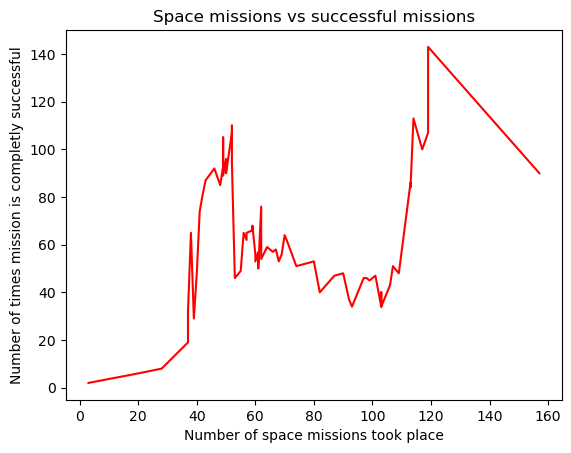

In [61]:
plt.title('Space missions vs successful missions') #for creating title
plt.plot(space_missions_yearly_df.value_counts(space_missions_yearly_df.year,ascending = True), success_yearly2_df.Success,'-r') #for creating line chart
plt.xlabel('Number of space missions took place') #for labeling x-axis
plt.ylabel('Number of times mission is completly successful'); #for labeling y-axis
sns.set_style('whitegrid')

In [64]:
# Example of reading the DataFrame from a CSV file
space_missions_df = pd.read_csv('space_missions.csv', encoding='latin1')


In [65]:
mission_location_df = space_missions_df.copy() #to keep orignal data untouched
mission_location_df['Country'] = mission_location_df['Location'].str.split(',').apply(lambda x: x[-1]) #to split and make new column of country
mission_location_df['year'] = pd.DatetimeIndex(mission_location_df.Date).year
mission_location_df.head(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Country,year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,Kazakhstan,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,Kazakhstan,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,USA,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,USA,1958


In [66]:
country_count = mission_location_df.Country.value_counts().head(10) #to count number of missions each country have done
country_count

 USA              1467
 Russia           1416
 Kazakhstan        719
 China             365
 France            318
 Japan             130
 India              82
 Pacific Ocean      36
 New Zealand        28
 Iran               16
Name: Country, dtype: int64

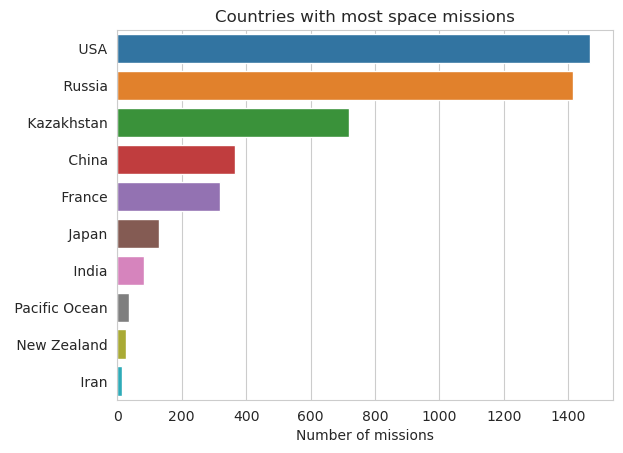

In [67]:
sns.barplot(x = country_count, y = country_count.index) #to make bar graph
plt.title('Countries with most space missions') #to create title
plt.xlabel('Number of missions'); #to label x-axis

In [68]:
mission_location_df[['Country','MissionStatus']].value_counts().head(10) #to know count of successful missions

Country      MissionStatus
 Russia      Success          1323
 USA         Success          1298
 Kazakhstan  Success           625
 China       Success           335
 France      Success           299
 USA         Failure           134
 Japan       Success           117
 Kazakhstan  Failure            72
 India       Success            68
 Russia      Failure            63
dtype: int64

In [69]:
rockets_df = space_missions_df.Rocket.value_counts().head(10) #to know count of rockets used in missions
rockets_df

Cosmos-3M (11K65M)      446
Voskhod                 299
Molniya-M /Block ML     128
Cosmos-2I (63SM)        126
Soyuz U                 125
Tsyklon-3               122
Falcon 9 Block 5        111
Tsyklon-2               106
Vostok-2M                93
Molniya-M /Block 2BL     87
Name: Rocket, dtype: int64

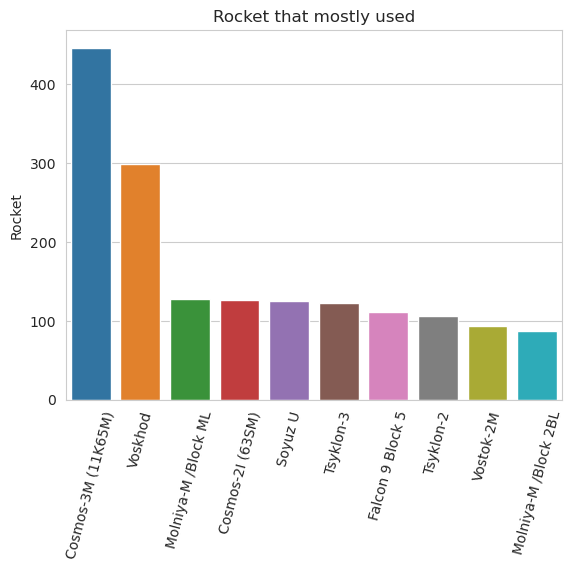

In [70]:
plt.title('Rocket that mostly used') #to create title
sns.barplot(x = rockets_df.index, y = rockets_df) #to create bar graph
plt.xticks(rotation = 75); #to rotate x-axis labels for clear visualization

In [71]:
space_missions_df[['Rocket','RocketStatus']].value_counts().head(10) #to know status of mostly used rockets

Rocket                RocketStatus
Cosmos-3M (11K65M)    Retired         446
Voskhod               Retired         299
Molniya-M /Block ML   Retired         128
Cosmos-2I (63SM)      Retired         126
Soyuz U               Retired         125
Tsyklon-3             Retired         122
Falcon 9 Block 5      Active          111
Tsyklon-2             Retired         106
Vostok-2M             Retired          93
Molniya-M /Block 2BL  Retired          87
dtype: int64

In [72]:
space_missions_df.MissionStatus.value_counts() #to count mission status

Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: MissionStatus, dtype: int64

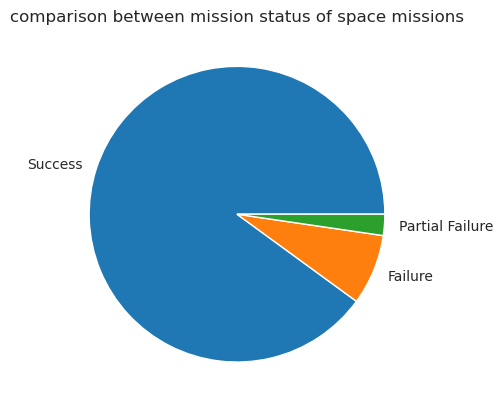

In [73]:
plt.title('comparison between mission status of space missions') #for creating title
plt.pie(space_missions_df.MissionStatus.value_counts().head(3),labels=['Success','Failure','Partial Failure']); #to create pie chart

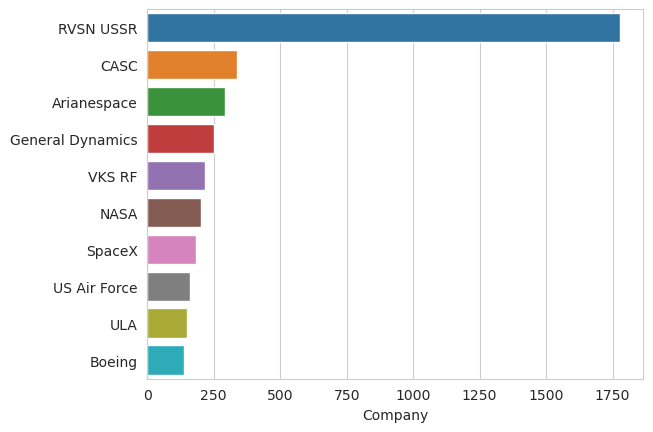

In [74]:
sns.barplot(x = space_missions_df.Company.value_counts().head(10),
            y = space_missions_df.Company.value_counts().head(10).index); #to create bar chart for the companies

## Conslusion